# Automated gap cartilage generation <a class="tocSkip"> 
This notebook explains a method to automatically generate the hj geometry based on the bone geometries

# imports

In [1]:
import numpy as np
import meshplot as mp
import pathlib
import sys
sys.path.append('../')
import cargen
import os

In [2]:
"""
DIRECTORIES:
"""
main_dir = pathlib.Path('..')

# input and output paths
i_dir = main_dir / 'models'
o_dir = main_dir / 'output'

# Remove all files inside output directory if it exists, otherwise create it
if o_dir.is_dir():
    for file in o_dir.iterdir():
        if file.is_file():
            file.unlink()
else:
    o_dir.mkdir(exist_ok=False)

In [3]:
"""
VALUES:

i_dim, o_dim = input and output dimension ("mm" = millimeters, "m" = meters)
i_format = the format of the input surface mesh ( ".obj" , ".stl")
o_format = format you want the files to be save at ( ".obj" , ".stl")
+ scroll down to calibrate the cartilage generation parameters
"""
# dimensions 
i_dim  = "mm"     
o_dim  = "mm"

i_format = ".stl"
o_format = ".obj"

In [4]:
"""
NAMES & PATHS:
"""
# bones
sacrum_name = 'sacrum'
lpelvis_name  = 'lpelvis' 

# cartilages
lsi_name = 'lsi'

#bones 
clean_sacrum_name  = 'clean_' + sacrum_name  + '_'+ o_dim
clean_lpelvis_name = 'clean_' + lpelvis_name + '_'+ o_dim

#cartilages
lsi_cart_name = lsi_name +'_cart_'+ o_dim
lsi_ring_name = lsi_name +'_ring_'+ o_dim

# input paths
sacrum_path  = str((i_dir/ sacrum_name).with_suffix(i_format))
lpelvis_path = str((i_dir/ lpelvis_name).with_suffix(i_format))

# output paths
#bones
clean_sacrum_path = str((o_dir/ clean_sacrum_name).with_suffix(o_format))
clean_lpelvis_path  = str((o_dir/ clean_lpelvis_name).with_suffix(o_format))

#cartilage
lsi_cart_path  = str((o_dir/ lsi_cart_name).with_suffix(o_format))
lsi_ring_path  = str((o_dir/ lsi_ring_name).with_suffix(o_format))

# implementation

## read and clean up input

In [5]:
s1_vertices, s1_faces  = cargen.read_and_clean ( sacrum_path, i_dim )
s2_vertices, s2_faces  = cargen.read_and_clean ( lpelvis_path, i_dim ) 

number of triangles after cleaning 54902
number of triangles after cleaning 69466


In [6]:
frame = mp.plot( s1_vertices, s1_faces, c = cargen.bone, shading = cargen.sh_false )
frame.add_mesh ( s2_vertices, s2_faces, c = cargen.bone, shading = cargen.sh_false )

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(4.9283256…

1

## left sacro-iliac joint

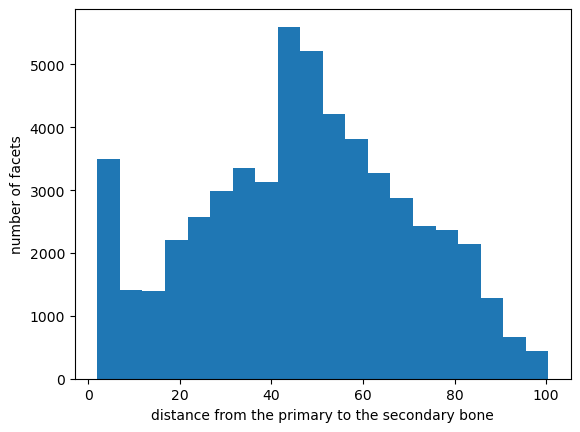

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(4.9283256…

Base layer: max dihedral angle before smoothing is  0.56 radians ( 32.09 degrees).


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(4.9283256…

Base layer: max dihedral angle after smoothing is  0.66 radians ( 37.82 degrees).


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(4.9365901…

Quality control results for the base layer: 

Everything is clean in the base layer. we will now continue to extrusion step:

Extruded layer: max dihedral angle before smoothing is  0.82 radians ( 46.98 degrees).


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-44.39503…

Extruded layer: max dihedral angle after smoothing is 1.53 radians ( 87.66 degrees).


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-44.38113…

Quality control results  for the extruded layer: 

Everything is clean in the extruded base layer. We will now continue to create the roof.



Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(4.9283256…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-44.38113…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-43.02504…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(4.9365901…

cartilage base area is:  2556.62
mean cartilage thickness is:  2.94
maximum cartilage thickness is:  4.48


In [7]:
# set the parameters
param = cargen.Var()

# change the ones you like
param.gap_distance = 4.6
param.trimming_iteration = 1
param.smoothing_iteration_base = 5
param.thickness_factor = 1
param.smoothing_iteration_extruded_base = 2

# make it
lsi_vertices, lsi_faces, ring_vertices, ring_faces = cargen.get_gap_cartilage(s1_vertices, s1_faces, 
                                                                              s2_vertices, s2_faces,
                                                                              param)


# reset the parameters to default values
param.reset()


## export results

### cartilage

In [8]:
cargen.save_surface ( lsi_vertices, lsi_faces, o_dim, lsi_cart_path )
cargen.save_surface ( ring_vertices, ring_faces, o_dim, lsi_ring_path )

### cleaned bones

In [9]:
cargen.save_surface ( s1_vertices, s1_faces, o_dim, clean_sacrum_path )
cargen.save_surface ( s2_vertices, s2_faces, o_dim, clean_lpelvis_path)

# voila!

In [10]:
frame = mp.plot( s1_vertices, s1_faces, c = cargen.bone,  shading = cargen.sh_false )
frame.add_mesh ( s2_vertices,  s2_faces,  c = cargen.bone, shading = cargen.sh_false )
frame.add_mesh ( ring_vertices, ring_faces,  c = cargen.pastel_orange, shading = cargen.sh_true )

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(4.9348888…

2

# check self intersection in tetgen

In [11]:
lsi_cart_test  = str((o_dir/ lsi_cart_name).with_suffix('.stl'))
cargen.save_surface ( lsi_vertices, lsi_faces, o_dim, lsi_cart_test )
os.system ( 'tetgen -d '+ lsi_cart_test )

0